# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
df1 = pd.read_csv("blackFriday_train.csv")
print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df2 = pd.read_csv("blackFriday_test.csv")
print(df2.shape)
df2.head()

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


# Merging the Datasets

In [6]:
data = df1.merge(df2, how = "outer" )
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [9]:
data.describe(include = "object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,783667,783667,783667,783667,783667
unique,3677,2,7,3,5
top,P00265242,M,26-35,B,1
freq,2709,590031,313015,329739,276425


In [10]:
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
data["Product_ID"].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00105742       1
P00074842       1
P00211742       1
P00364342       1
P00030342       1
Name: Product_ID, Length: 3677, dtype: int64

# Converting cateogrical data into integar ones by using mapping function

In [13]:
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [14]:
data["Gender"]=data["Gender"].map({"F": 0, "M":1})
data["Gender"]#Checking the column after transformation

0         0
1         0
2         0
3         0
4         1
         ..
783662    0
783663    0
783664    0
783665    0
783666    0
Name: Gender, Length: 783667, dtype: int64

# Mapping Age Value  in integar ones

In [15]:
data["Age"]

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
783662    26-35
783663    26-35
783664    26-35
783665    46-50
783666    46-50
Name: Age, Length: 783667, dtype: object

In [16]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [17]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [18]:
data.groupby(["Marital_Status"])["Age"].value_counts()

Marital_Status  Age  
0               26-35    189800
                18-25    111821
                36-45     94766
                0-17      21334
                46-50     18205
                51-55     15352
                55+       11260
1               26-35    123215
                36-45     61958
                46-50     47073
                51-55     39432
                18-25     30132
                55+       19319
Name: Age, dtype: int64

In [19]:
data["Age"] = data["Age"].map({'0-17':0,'18-25':1 ,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

In [20]:
data["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [21]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [22]:
data["Stay_In_Current_City_Years"].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [23]:
data["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [24]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [25]:
data.groupby(["Marital_Status"])["Stay_In_Current_City_Years"].value_counts()

Marital_Status  Stay_In_Current_City_Years
0               1                             157873
                2                              86730
                3                              81802
                4+                             72291
                0                              63842
1               1                             118552
                2                              58697
                3                              53626
                4+                             48380
                0                              41874
Name: Stay_In_Current_City_Years, dtype: int64

In [26]:
data.shape

(783667, 12)

# creating dummies for the categorical data

alogo type :- one hot encoding

In [27]:
data.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [28]:
city = pd.get_dummies(data["City_Category"],prefix = "city_",drop_first = True)
city.head(10)

,city__B,city__C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,1,0
7,1,0
8,1,0
9,0,0


In [29]:
data = pd.concat((data,city),axis = 1)
data.head() # checking the datast after transformation

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city__B,city__C
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [30]:
data.drop("City_Category",axis=1,inplace = True)

In [31]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city__B,city__C
0,1000001,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0


In [32]:
data.rename(columns={"city__B":"city_b","city__C":"city_c"},inplace =True)

In [33]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
city_b                             0
city_c                             0
dtype: int64

In [34]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
city_b                          uint8
city_c                          uint8
dtype: object

In [35]:
data["Product_Category_2"].fillna(0,inplace = True)

In [36]:
data["Product_Category_3"].fillna(0,inplace = True)

In [37]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
city_b                             0
city_c                             0
dtype: int64

In [38]:
data["Purchase"].median()

8047.0

In [39]:
data.groupby("Product_ID")["Purchase"].sum()

Product_ID
P00000142    12837476.0
P00000242     3967496.0
P00000342     1296475.0
P00000442      441173.0
P00000542      807212.0
                ...    
P0099542            0.0
P0099642        83710.0
P0099742       991948.0
P0099842       737312.0
P0099942        78019.0
Name: Purchase, Length: 3677, dtype: float64

In [40]:
data.iloc[:550068,:].isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
city_b                        0
city_c                        0
dtype: int64

In [41]:
data.iloc[550068:,:].shape

(233599, 13)

In [42]:
data.iloc[550068:,:].isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
city_b                             0
city_c                             0
dtype: int64

In [43]:
test = data.iloc[550068:,:]

In [44]:
test

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city_b,city_c
550068,1000004,P00128942,1,4,7,2,1,1,11.0,0.0,NaN,1,0
550069,1000009,P00113442,1,2,17,0,0,3,5.0,0.0,NaN,0,1
550070,1000010,P00288442,0,3,1,4+,1,5,14.0,0.0,NaN,1,0
550071,1000010,P00145342,0,3,1,4+,1,4,9.0,0.0,NaN,1,0
550072,1000011,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,4+,1,8,0.0,0.0,NaN,1,0
783663,1006036,P00254642,0,2,15,4+,1,5,8.0,0.0,NaN,1,0
783664,1006036,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,4,1,4+,0,10,16.0,0.0,NaN,0,1


In [45]:
data = data.iloc[:550068,:]

In [46]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
city_b                        0
city_c                        0
dtype: int64

In [47]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
city_b                          uint8
city_c                          uint8
dtype: object

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

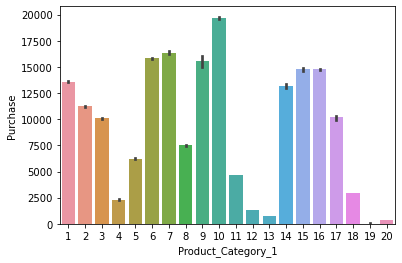

In [48]:
sns.barplot(x = "Product_Category_1", y = "Purchase",data = data)

# Checking for columnwise null values

In [49]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
city_b                        0
city_c                        0
dtype: int64

# Visualing the unique values of fields which contain Nan values for different columns

In [50]:
data["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [51]:
data["Product_Category_2"].unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [52]:
data["Product_Category_3"].unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [53]:
data["Purchase"].unique()

array([ 8370., 15200.,  1422., ...,   135.,   123.,   613.])

# Value count of each variable

In [54]:
data.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [55]:
data.Product_Category_2.value_counts()

0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [56]:
data.Product_Category_3.value_counts()

0.0     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

# Filling the Nan Value

In [57]:
#data["Product_Category_2"] = data["Product_Category_2"].fillna(0)

In [58]:
#data["Product_Category_3"] = data["Product_Category_3"].fillna(0)

In [59]:
data

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city_b,city_c
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,20,0.0,0.0,368.0,1,0
550064,1006035,P00375436,0,2,1,3,0,20,0.0,0.0,371.0,0,1
550065,1006036,P00375436,0,2,15,4+,1,20,0.0,0.0,137.0,1,0
550066,1006038,P00375436,0,6,1,2,0,20,0.0,0.0,365.0,0,1


In [60]:
#data.drop(["Product_Category_3","Product_Category_2"],axis=1,inplace = True)

In [61]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'city_b',
       'city_c'],
      dtype='object')

In [62]:
data

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city_b,city_c
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,20,0.0,0.0,368.0,1,0
550064,1006035,P00375436,0,2,1,3,0,20,0.0,0.0,371.0,0,1
550065,1006036,P00375436,0,2,15,4+,1,20,0.0,0.0,137.0,1,0
550066,1006038,P00375436,0,6,1,2,0,20,0.0,0.0,365.0,0,1


In [63]:
data.isnull().sum() # Checking the dataframe again null vslues Product_Category_2,Product_Category_3 no more have null values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
city_b                        0
city_c                        0
dtype: int64

# Filling the nan values with the mean of the column.

In [64]:
data["Purchase"] = data["Purchase"].fillna(data["Purchase"].mean())

In [65]:
data.head() # Looking the dataframe after filling the null values 

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,city_b,city_c
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969.0,0,1


# Rechecking the null values

In [66]:
data.isnull().sum() # all the null values are removed

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
city_b                        0
city_c                        0
dtype: int64

# Renaming some columns name

In [67]:
data = data.rename(columns = {'Stay_In_Current_City_Years':"Stay_city_years",'Product_Category_1':"cat1",'Product_Category_2':"cat2",
                      'Product_Category_3':"cat3"})

In [68]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_city_years,Marital_Status,cat1,cat2,cat3,Purchase,city_b,city_c
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969.0,0,1


# Replacing the value using str method

In [69]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_city_years', 'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase',
       'city_b', 'city_c'],
      dtype='object')

In [70]:
data.Stay_city_years = data['Stay_city_years'].str.replace("+","") # replaceing + with blank 

In [71]:
data.Stay_city_years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

# Converting the datatypes into intger ones as the datatype for these columns are shown as unsignedint in the info above

In [72]:
data["Stay_city_years"] = data["Stay_city_years"].astype(int)

In [73]:
data.dtypes

User_ID              int64
Product_ID          object
Gender               int64
Age                  int64
Occupation           int64
Stay_city_years      int32
Marital_Status       int64
cat1                 int64
cat2               float64
cat3               float64
Purchase           float64
city_b               uint8
city_c               uint8
dtype: object

In [74]:
data.Stay_city_years.mean()

1.8584175047448679

In [75]:
data.Stay_city_years.median()

2.0

# Rechecking the data types of dataset

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   User_ID          550068 non-null  int64  
 1   Product_ID       550068 non-null  object 
 2   Gender           550068 non-null  int64  
 3   Age              550068 non-null  int64  
 4   Occupation       550068 non-null  int64  
 5   Stay_city_years  550068 non-null  int32  
 6   Marital_Status   550068 non-null  int64  
 7   cat1             550068 non-null  int64  
 8   cat2             550068 non-null  float64
 9   cat3             550068 non-null  float64
 10  Purchase         550068 non-null  float64
 11  city_b           550068 non-null  uint8  
 12  city_c           550068 non-null  uint8  
dtypes: float64(3), int32(1), int64(6), object(1), uint8(2)
memory usage: 65.4+ MB


# Visualizing Age Vs Purchased

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
sns.set(style = "darkgrid")

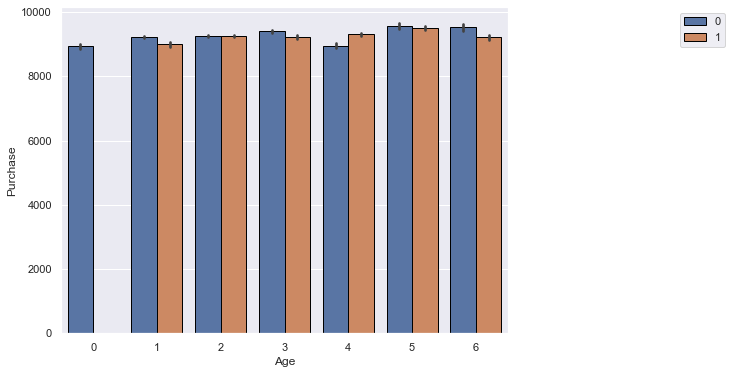

In [79]:
plt.figure(figsize= (8,6))
sns.barplot(x= "Age",y = "Purchase", data = data,hue = "Marital_Status" ,edgecolor = "black")
plt.legend(bbox_to_anchor=(1.5,1),loc='upper right')
plt.show()

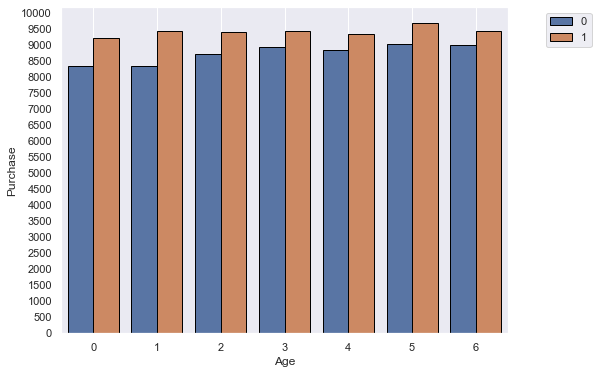

In [80]:
plt.figure(figsize= (8,6))
y = range(0,10001,500)
sns.barplot(x="Age",y = "Purchase", hue = "Gender", data =data, ci = False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.20,1),loc = "upper right")

plt.show()

In [81]:
data.Purchase.max()

23961.0

Purchasing of goods of each range of age are almost equal. we can conclude that the percenatge of purchasing goods of men over
women is higher.

# Visualizing Occupation Vs Purchased

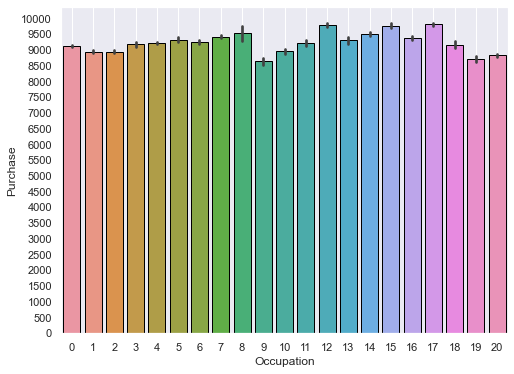

In [82]:
y = range(0,10001,500)
plt.figure(figsize= (8,6))
plt.yticks(y)
sns.barplot(x = "Occupation", y = "Purchase",data =data,edgecolor = "black")
plt.grid()
plt.show();

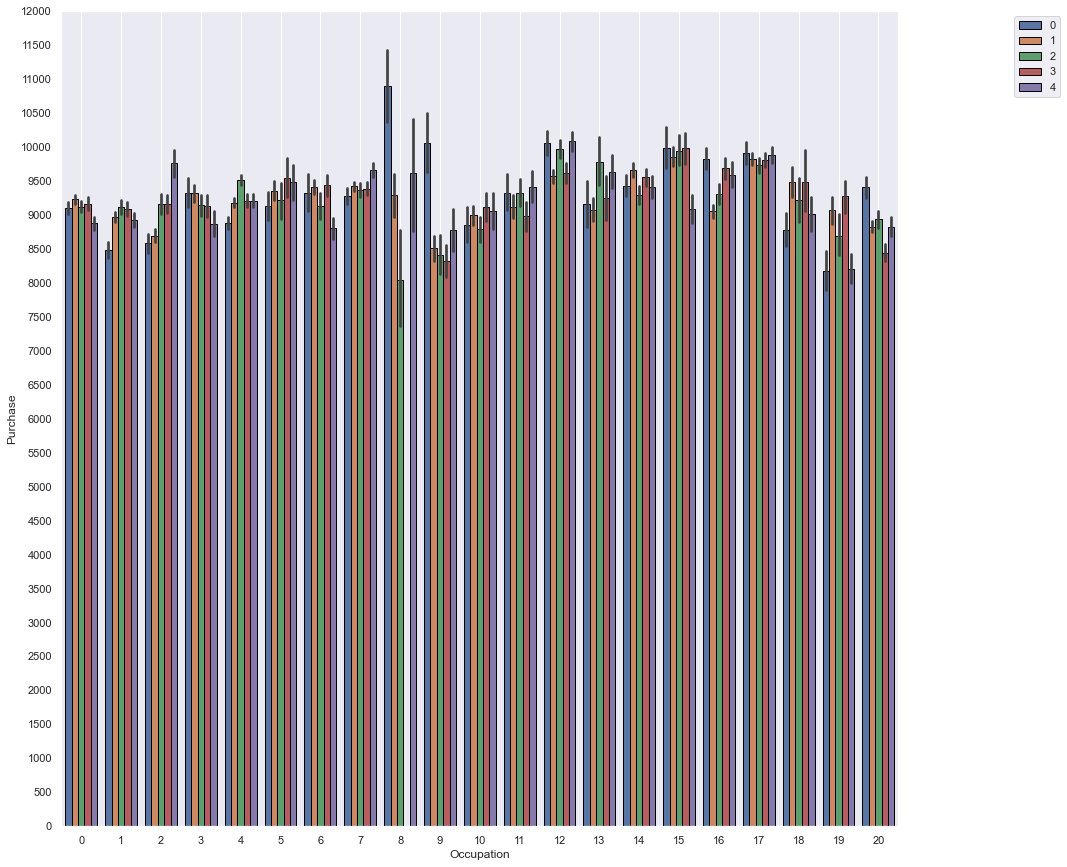

In [83]:
y = range(0,140001,500)
plt.figure(figsize= (15,15))
plt.yticks(y)
sns.barplot(x = "Occupation", y = "Purchase", hue = "Stay_city_years",
            data = data, edgecolor = "black")
plt.grid()
plt.legend(bbox_to_anchor=(1.20,1),loc = "upper right")
plt.show();

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

In [84]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_city_years', 'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase',
       'city_b', 'city_c'],
      dtype='object')

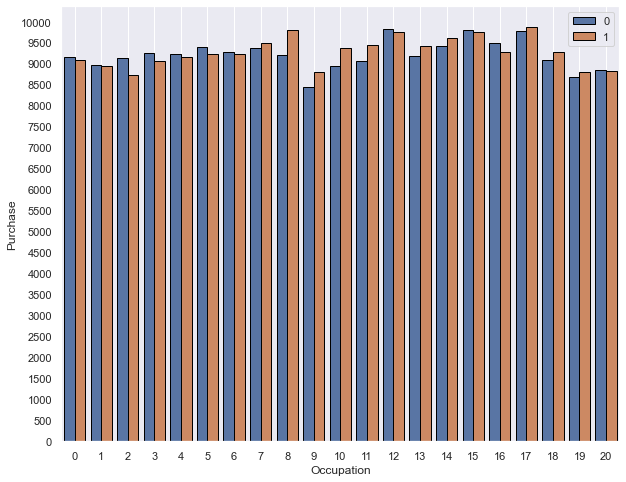

In [85]:
plt.figure(figsize = (10,8))
y = range(0,10001,500)
sns.barplot(x = 'Occupation', y = "Purchase", hue = 'Marital_Status',data = data, ci  = False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

# Visualizing Product_category1 Vs Purchased.

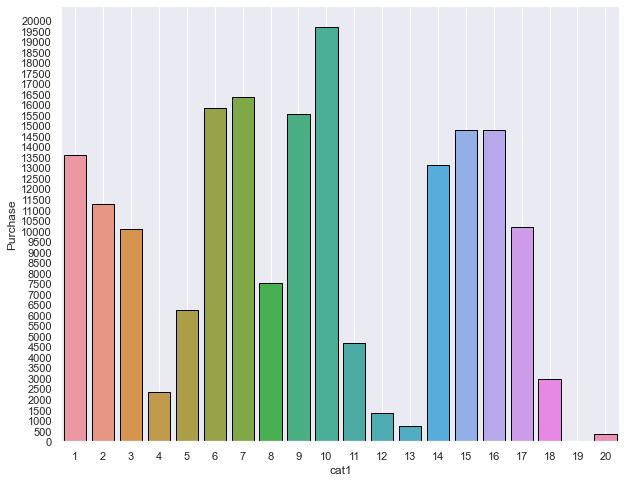

In [86]:
plt.figure(figsize = (10,8))
y = range(0,20001,500)
sns.barplot(x = "cat1", y = "Purchase", data = data,ci =False, edgecolor = "black")
plt.yticks(y)
plt.grid()
#plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show();

In [87]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_city_years', 'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase',
       'city_b', 'city_c'],
      dtype='object')

In [88]:
data["cat2"] = data["cat2"].astype(int)

In [89]:
data.groupby(["cat1"])["Purchase"].mean()

cat1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

<Figure size 720x576 with 0 Axes>

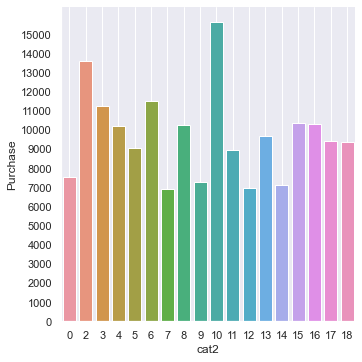

In [90]:
plt.figure(figsize = (10,8))
y = range(0,16000,1000)
sns.catplot(x = "cat2", y = "Purchase", data = data,ci =False, kind = "bar")
plt.yticks(y)
plt.grid()
#plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show();

As per the Visualizition we conclude that Highest purchasing in value 10

<Figure size 720x576 with 0 Axes>

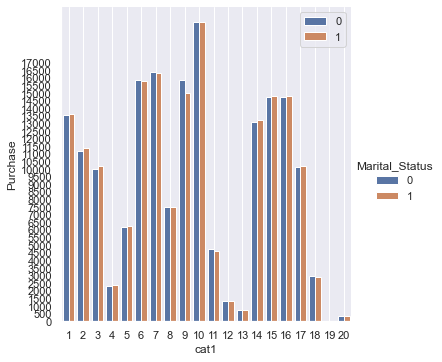

In [91]:
plt.figure(figsize = (10,8))
y = range(0,17001,500)
sns.catplot(x= "cat1", y = "Purchase",hue = "Marital_Status", data =data, kind = "bar", ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

In Product Category 1 contributes almost same in purchasing rates highest bill generating value in 10 and it won't affect alot that Marital Status also

<Figure size 720x576 with 0 Axes>

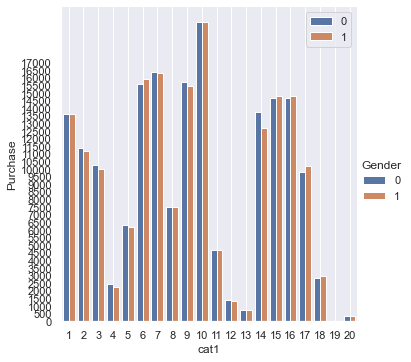

In [92]:
plt.figure(figsize = (10,8))
y = range(0,17001,500)
sns.catplot(x= "cat1", y = "Purchase",hue ='Gender' , data =data, kind = "bar",ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

we can conclude that the percenatge of purchasing goods in Product category 1 of women over men is higher.

No handles with labels found to put in legend.


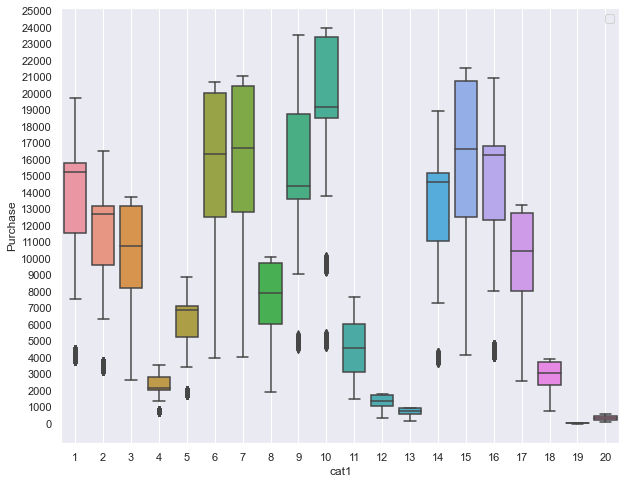

In [93]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.boxplot(x= "cat1", y = "Purchase", data =data)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

By using of box plot we can conclude that highest Purchase are genrating in value 9 and value 10 and minimum purchasing are between 4500 to 4800 and the maximum is 24000 in value 10.

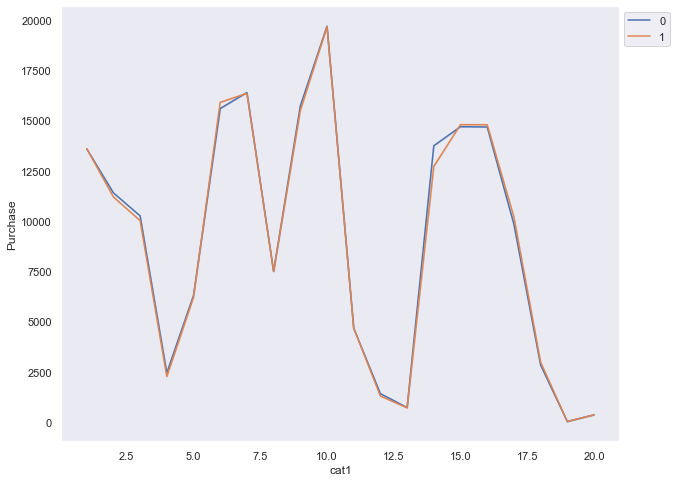

In [94]:
plt.figure(figsize = (10,8))
sns.lineplot(x= "cat1", y = "Purchase",hue="Gender" ,data =data, ci  = False)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

As we can see in the lineplot there is no difference in the marking due to gender.

In [95]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_city_years', 'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase',
       'city_b', 'city_c'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

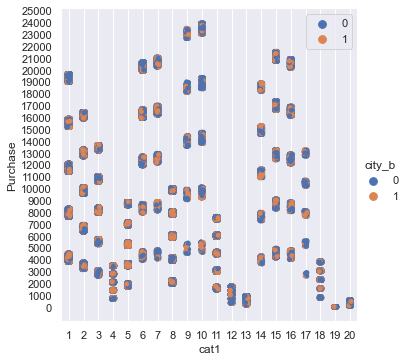

In [96]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.catplot(x= "cat1", y = "Purchase",hue ='city_b', data =data,ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show();

<Figure size 720x576 with 0 Axes>

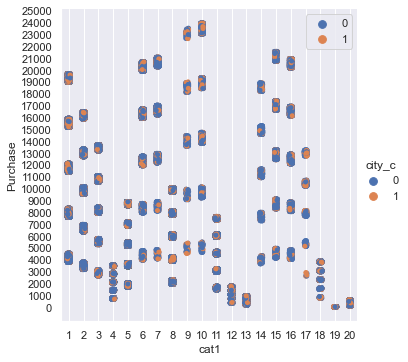

In [97]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.catplot(x= "cat1", y = "Purchase",hue ='city_c', data =data,ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

# Visualizing Product_category2 Vs Purchased.

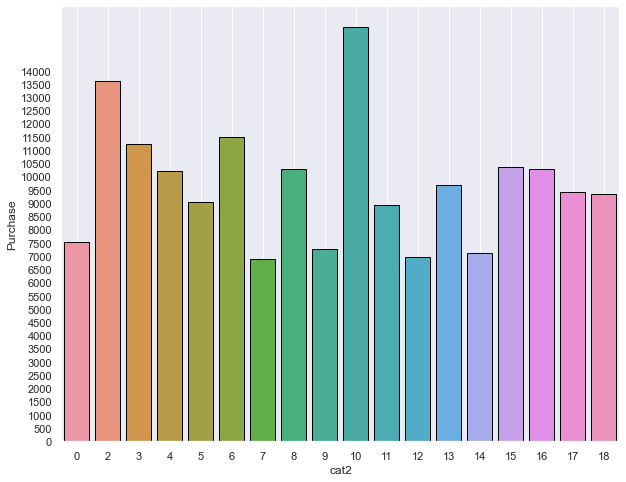

In [98]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x = "cat2", y = "Purchase", data = data,ci =False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.show()


As per the Visualizition we conclude that Highest purchasing in value 10

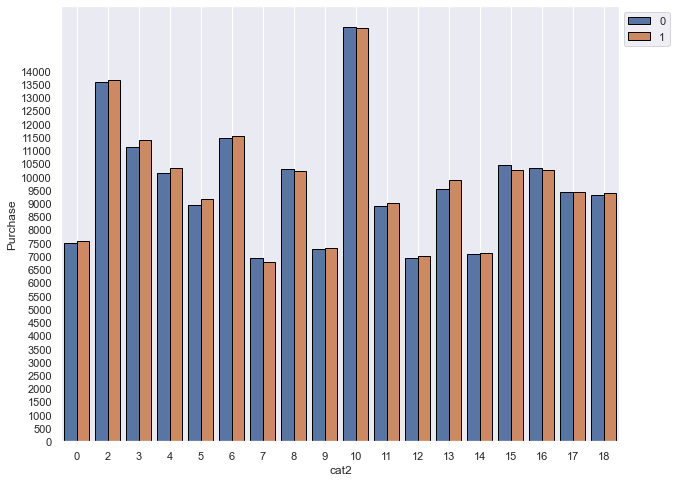

In [99]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat2", y = "Purchase",hue = "Marital_Status", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

In Product Category 2 contributes almost same in purchasing rates highest bill generating value in 10 and it won't affect alot that Marital Status also

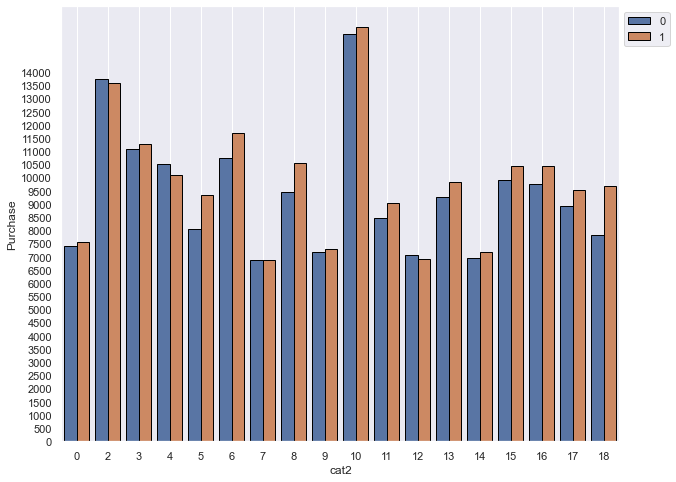

In [100]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat2", y = "Purchase",hue = "Gender", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

we can conclude that the percenatge of purchasing goods in Product category 2 of women over men is higher.

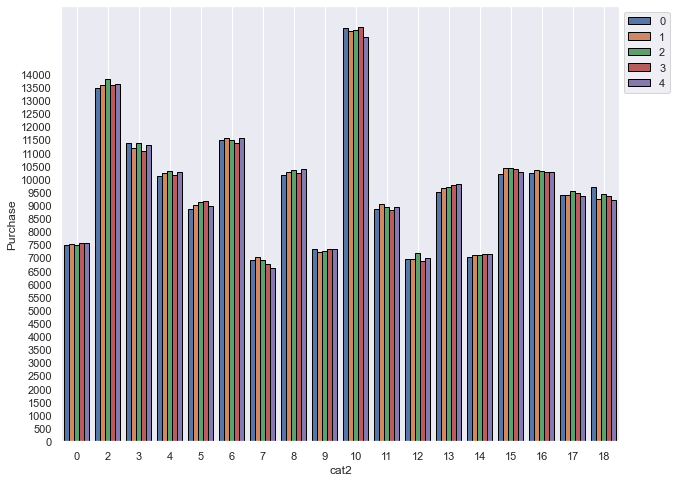

In [101]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat2", y = "Purchase",hue = "Stay_city_years", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

No handles with labels found to put in legend.


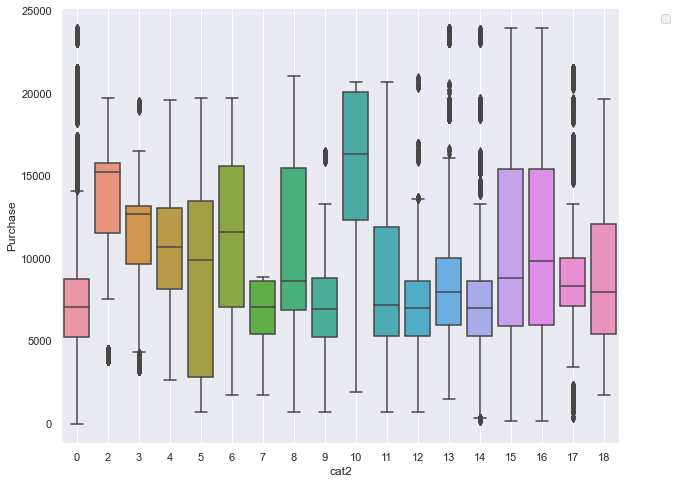

In [102]:
plt.figure(figsize = (10,8))
sns.boxplot(x= "cat2", y = "Purchase", data =data)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

As we can see with the help of boxplot, category 2 has more outlayers as compared to category 1

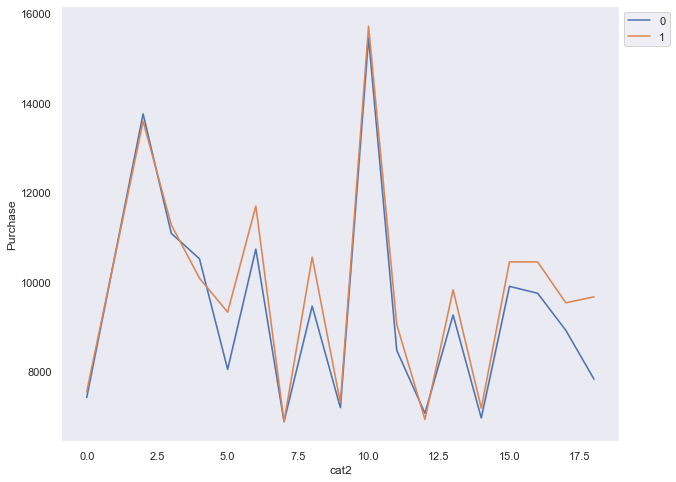

In [103]:
plt.figure(figsize = (10,8))
sns.lineplot(x= "cat2", y = "Purchase",hue="Gender" ,data =data, ci  = False)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

As we can see in the lineplot there is no difference in the marking due to gender.

<Figure size 720x576 with 0 Axes>

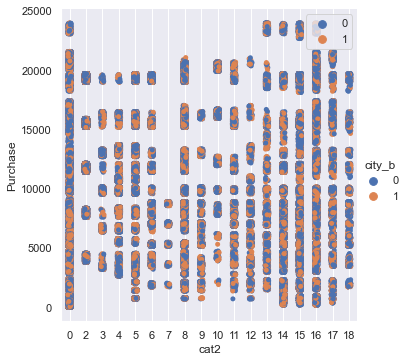

In [104]:
plt.figure(figsize = (10,8))
#y = range(0,25001,1000)
sns.catplot(x= "cat2", y = "Purchase",hue ='city_b', data =data,ci = False)
#plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

<Figure size 720x576 with 0 Axes>

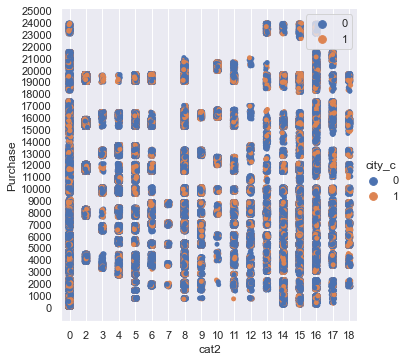

In [105]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.catplot(x= "cat2", y = "Purchase",hue ='city_c', data =data,ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

# Visualizing Product_category 3 Vs Purchased.

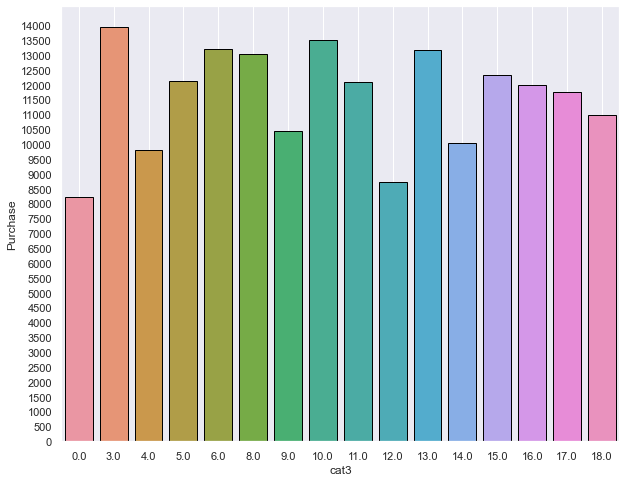

In [106]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x = "cat3", y = "Purchase", data = data,ci =False, edgecolor = "black")
plt.yticks(y)
plt.grid()
plt.show()


There is not much difference in marking in category 3 across all values

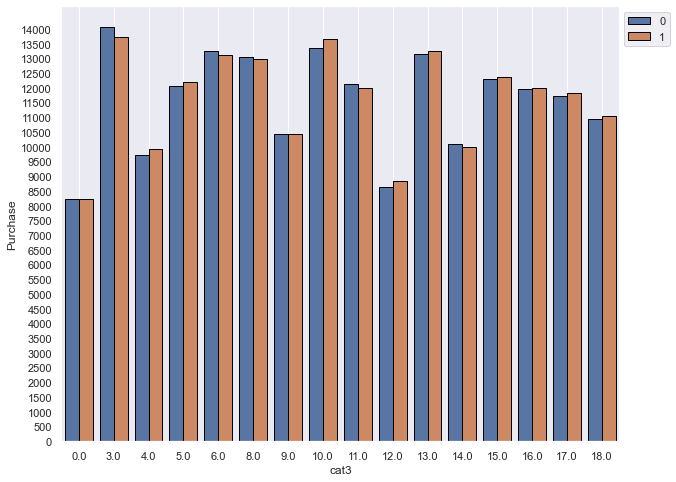

In [107]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat3", y = "Purchase",hue = "Marital_Status", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

In Product Category 3 contributes almost same in purchasing rates it won't affect alot that Marital Status also

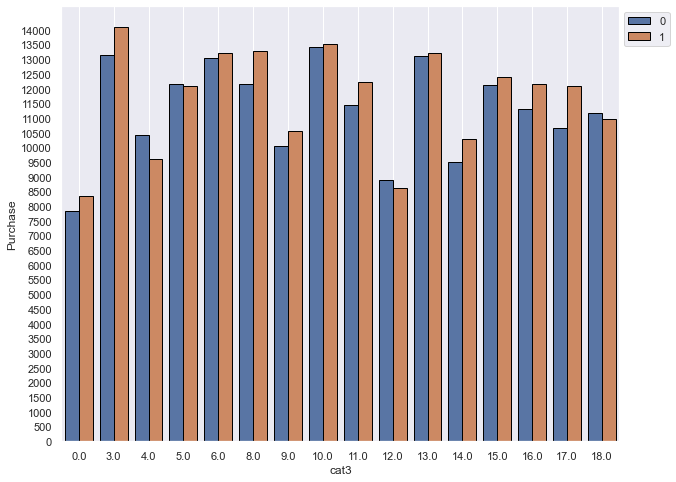

In [108]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat3", y = "Purchase",hue = "Gender", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

we can conclude that the percenatge of purchasing goods in Product category 3 there are not that much difference but somewhere men over women is higher.

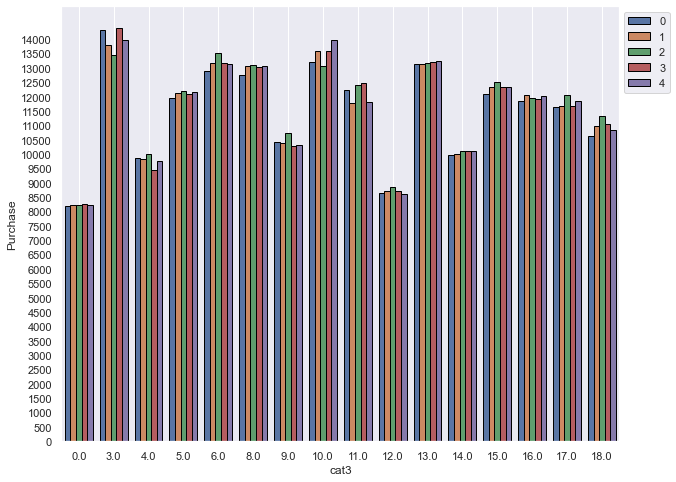

In [109]:
plt.figure(figsize = (10,8))
y = range(0,14001,500)
sns.barplot(x= "cat3", y = "Purchase",hue = "Stay_city_years", data =data,ci = False, edgecolor= "black")
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

No handles with labels found to put in legend.


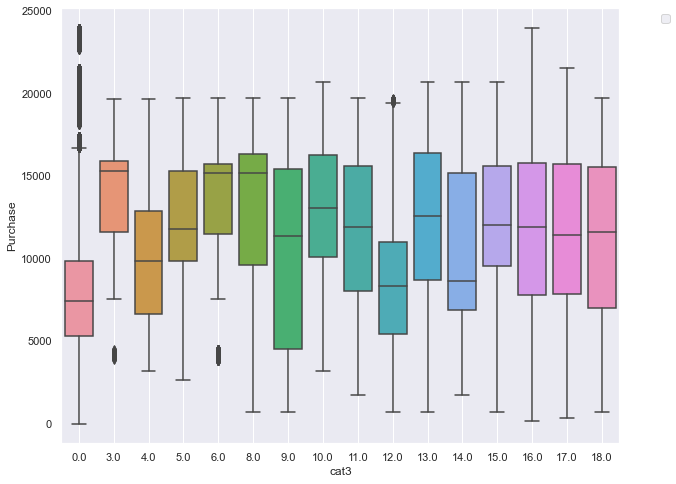

In [110]:
plt.figure(figsize = (10,8))
sns.boxplot(x= "cat3", y = "Purchase", data =data)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

There are not that much difference in purchasing, outliers are less then product category 2 , purcahsing is almost common between quartile 2 to quartile 3

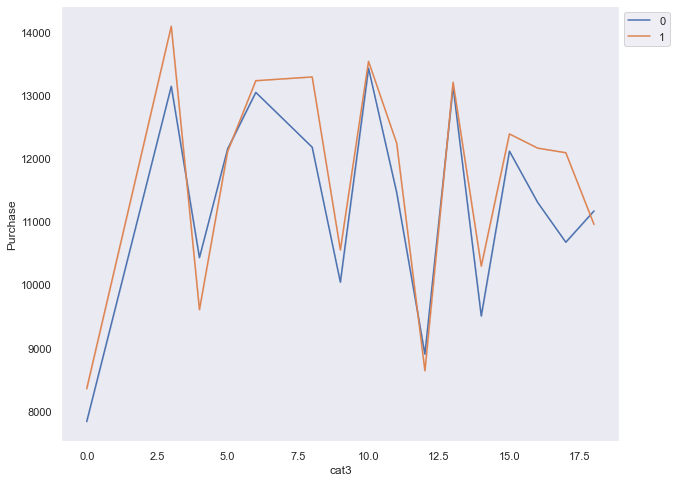

In [111]:
plt.figure(figsize = (10,8))
sns.lineplot(x= "cat3", y = "Purchase",hue="Gender" ,data =data, ci  = False)
plt.grid()
plt.legend(bbox_to_anchor=(1.10,1),loc = "upper right")
plt.show()

<Figure size 720x576 with 0 Axes>

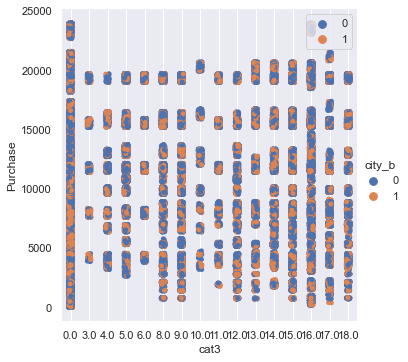

In [112]:
plt.figure(figsize = (10,8))
#y = range(0,25001,1000)
sns.catplot(x= "cat3", y = "Purchase",hue ='city_b', data =data,ci = False)
#plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

<Figure size 720x576 with 0 Axes>

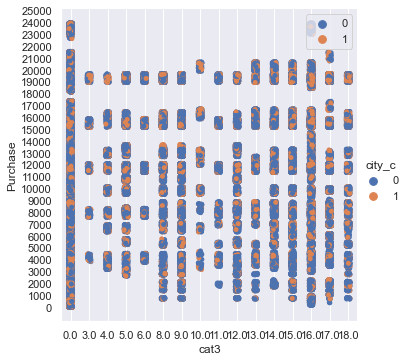

In [113]:
plt.figure(figsize = (10,8))
y = range(0,25001,1000)
sns.catplot(x= "cat3", y = "Purchase",hue ='city_c', data =data,ci = False)
plt.yticks(y)
plt.grid()
plt.legend(bbox_to_anchor=(1,1),loc = "upper right")
plt.show()

In [114]:
prod_by_occ = data.groupby(['Occupation'])['Product_ID'].nunique()

In [115]:
prod_by_occ

Occupation
0     3249
1     3037
2     2906
3     2667
4     3184
5     2353
6     2733
7     3082
8     1033
9     1832
10    2124
11    2247
12    2675
13    1959
14    2688
15    2189
16    2872
17    2840
18    2056
19    2309
20    3156
Name: Product_ID, dtype: int64

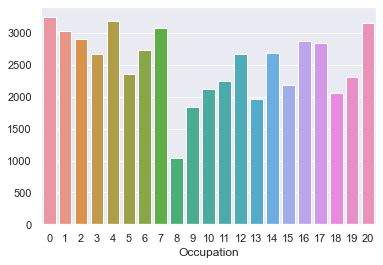

In [116]:
sns.barplot(x = prod_by_occ.index,y = prod_by_occ.values);

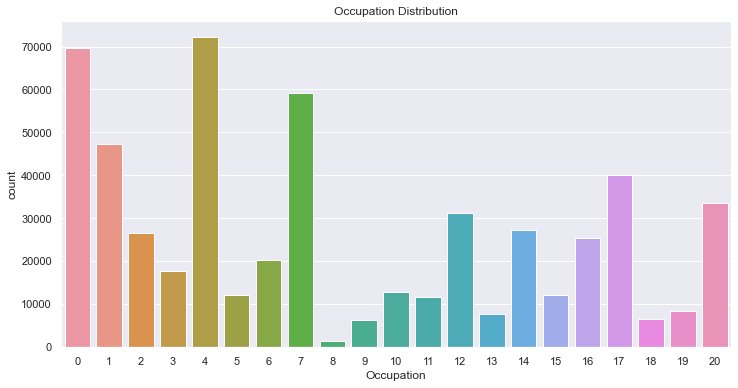

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(data['Occupation'])
plt.title('Occupation Distribution')
plt.show()